In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import pandas as pd

# Read the CSV

In [2]:
df = pd.read_csv("test - Sheet1.csv")

In [107]:
df

,Column1,Total Idlength,Idcount,No. of Comments,comment length,complexity,Function Count,Inheritance Count,DIT,Lines of Code,BlankLines,Char Count,Max Function Complexity,Avg. Id Length,Complexity2,Comments%,Grades
0,395,473,83,75,2579,90,15,0,0,334,22,7245,37,5.698795,6.000000,24.038462,94.588235
1,396,463,81,55,1591,94,19,0,0,275,25,5629,18,5.716049,4.947368,22.000000,100.862745
2,398,873,135,77,1988,96,20,0,0,476,71,9344,24,6.466667,4.800000,19.012346,103.196078
3,424,649,89,76,2791,91,19,0,0,331,37,6254,22,7.292135,4.789474,25.850340,105.000000
4,458,298,41,83,2492,86,11,0,0,360,22,6211,35,7.268293,7.818182,24.556213,25.333333
5,459,1164,187,165,4764,109,23,0,0,613,98,11197,22,6.224599,4.739130,32.038835,98.784314
6,475,296,47,19,671,63,5,0,0,222,22,4579,30,6.297872,12.600000,9.500000,25.000000
7,481,602,82,67,2962,93,16,0,0,298,20,6469,24,7.341463,5.812500,24.100719,77.117647
8,488,482,59,92,2334,70,16,0,0,283,33,4874,15,8.169492,4.375000,36.800000,25.000000
9,491,730,94,75,2274,96,19,0,0,380,38,7990,27,7.765957,5.052632,21.929825,103.196078


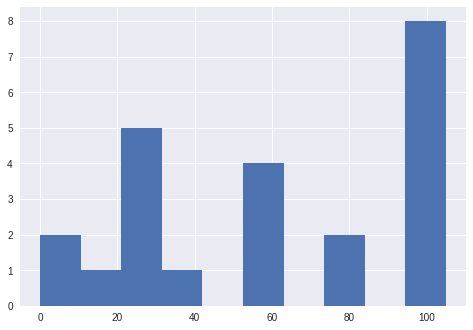

In [18]:
df['Grades'].hist()

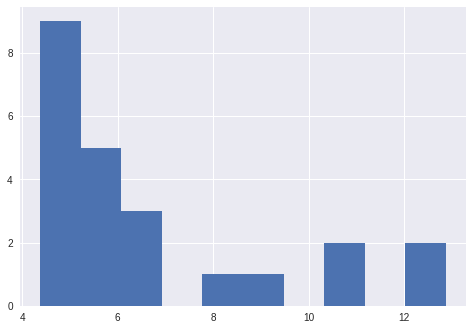

In [13]:
df['Complexity2'].hist()

# Correlation

A correlation score somewhere near to -0.4 - negative correlation, but not significantly high.

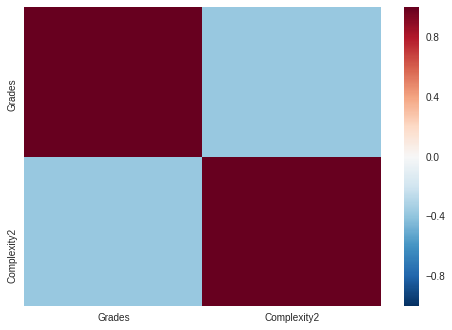

In [19]:
new_df = df[['Grades', 'Complexity2']].copy()

import seaborn as sns
corr = new_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Grades v/s Complexity

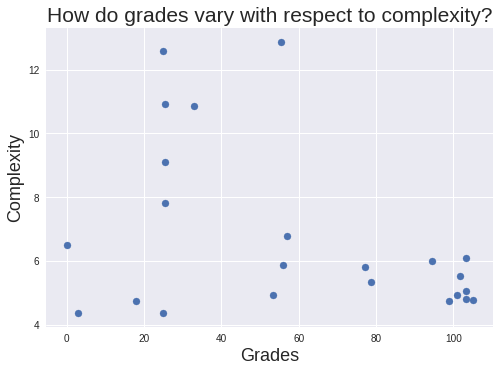

In [106]:
import matplotlib.pyplot as plt
plt.scatter(new_df['Grades'], new_df['Complexity2'])
plt.title('How do grades vary with respect to complexity?', fontsize=21)
plt.xlabel('Grades', fontsize=18)
plt.ylabel('Complexity', fontsize=18)

## No fixed pattern 

We see that there is no fixed pattern; However, if you divide the grades in 3 ranges; there is some pattern

1. 0-30  : As the grade increases, complexity increases. +ve correlation.
2. 40-80 : Low complexity
3. Above 80 : Low Complexity again.

# Clusters 

In [100]:
from sklearn.cluster import KMeans

In [101]:
X = new_df
kmeans = KMeans(n_clusters=3).fit(X)
kmeans.labels_

array([0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 2], dtype=int32)

## Cluster centers

Cluster centers : [Average Grade in that cluster, Average complexity in that cluster]

Below are the 3 centers; Looks like the whole dataset doesnt follow a fixed pattern, but the data in each of  these clusters do.

In [102]:
kmeans.cluster_centers_

array([[ 101.31862744,    5.24315885],
       [  19.98474945,    7.92633169],
       [  62.9379085 ,    6.93958333]])

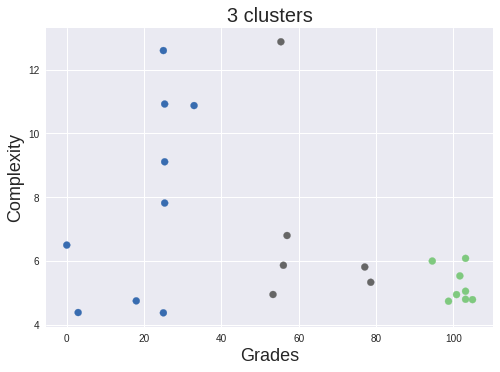

In [104]:
plt.scatter(X['Grades'], X['Complexity2'], c=kmeans.labels_, cmap="Accent")
plt.title("3 clusters", fontsize=20)
plt.xlabel('Grades', fontsize=18)
plt.ylabel('Complexity', fontsize=18)